In [1]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

# 1 Import DEG UP & DOWN data 

In [2]:
# IMPORT raw data 
deg_na = pd.read_csv('11_identify_DEG/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Anoxia')
deg_nr = pd.read_csv('11_identify_DEG/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Reoxygenation')
deg_ar = pd.read_csv('11_identify_DEG/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='Anoxia to Reoxygenation')

In [3]:
# drop rows that contains NaN in the padj column 
deg_na = deg_na.dropna(subset=['padj'])
deg_nr = deg_nr.dropna(subset=['padj'])
deg_ar = deg_ar.dropna(subset=['padj'])

# filter for NaN in log2FoldChange column 
deg_na = deg_na.dropna(subset=['log2FoldChange'])
deg_nr = deg_nr.dropna(subset=['log2FoldChange'])
deg_ar = deg_ar.dropna(subset=['log2FoldChange'])

In [4]:
# set threshold for fold change 
fold_threshold = 1.3 
p_threshold = 0.05

# 2 Vulcano Plot DEGs 

In [5]:
# merge the dataframes and add column with name of comparison
deg = pd.concat([deg_na, deg_nr, deg_ar])

# calculate -log10(padj) for each comparison
deg['-log10p'] = -np.log10(deg['padj'])

# introduce color code 
deg['color'] = 0

# color code for significant genes
deg.loc[abs(deg['log2FoldChange']) >= np.log2(fold_threshold) , 'color'] +=1
deg.loc[deg['padj'] <= p_threshold , 'color'] +=1

# convert number code into str for Legend labels 
deg.loc[deg['color'] <= 1, 'color'] = 'Not Differentially Expressed'
deg.loc[deg['color'] == 2, 'color'] = 'Differentially Expressed'

In [6]:
# Vulcano plot
def add_deg_number(data, **kwargs):
    """Add the number of DEGs to each subplot."""
    if np.all(data['color'] == 'Not Differentially Expressed'):
        return 
    elif np.all(data['color'] == 'Differentially Expressed'):
        pos = sum((data['log2FoldChange'] >= np.log2(fold_threshold)))
        neg = sum((data['log2FoldChange'] <= -np.log2(fold_threshold)))
        plt.text(x=-5, y=80, s=fr'$\downarrow${neg}', fontsize=8, ha='center', va='center')
        plt.text(x=+5, y=80, s=fr'$\uparrow${pos}', fontsize=8, ha='center', va='center')


/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/rnaseq/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


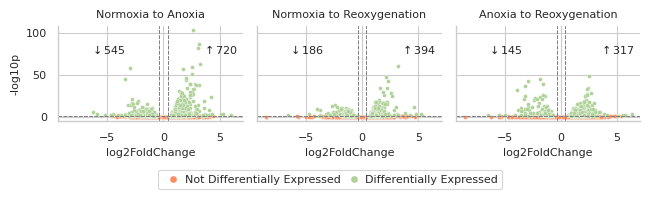

In [7]:
# create subplot for 3 plots 
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})

g = sns.FacetGrid(deg, col="condition", hue='color', palette=['#FC8D62', '#AFD198'], height=((4.5)/2.54), aspect=(17/4.5)/3)
g.refline(y=-np.log10(p_threshold), linestyle='--', linewidth=0.7, color='grey')
g.refline(x = np.log2(fold_threshold), linestyle='--', linewidth=0.7, color='grey')
g.refline(x = -np.log2(fold_threshold), linestyle='--', linewidth=0.7, color='grey')
g.map(sns.scatterplot, 'log2FoldChange','-log10p', s=8, rasterized=True)
g.add_legend(title='', fontsize=8, loc='upper center', borderaxespad=0.1, ncol=2, bbox_to_anchor=(.33, 0.02), frameon=True, markerscale=1.8, 
            columnspacing=0.2, scatteryoffsets=[0.5], handletextpad=0.01)

g.set_titles(col_template="{col_name}", fontsize=8)
g.map_dataframe(add_deg_number)
g.tight_layout()

# save as png
g.savefig('11_identify_DEG/vulcano_plot_DEG.svg', dpi=600)
plt.show()

# 3 Split UP & DOWN regulated genes 

In [8]:
# split dataframe by log2FoldChange column. positive values are upregulated, negative values are downregulated
deg_na_up = deg_na[(deg_na['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_na['padj'] <= p_threshold )]
deg_na_down = deg_na[(deg_na['log2FoldChange'] <= -np.log2(fold_threshold)) & (deg_na['padj'] <= p_threshold)].assign(regulation='down')
deg_nr_up = deg_nr[(deg_nr['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_nr['padj'] <= p_threshold)]
deg_nr_down = deg_nr[(deg_nr['log2FoldChange'] <= -np.log2(fold_threshold)) & (deg_nr['padj'] <= p_threshold)].assign(regulation='down')
deg_ar_up = deg_ar[(deg_ar['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_ar['padj'] <= p_threshold)]
deg_ar_down = deg_ar[(deg_ar['log2FoldChange'] <= -np.log2(fold_threshold)) & (deg_ar['padj'] <= p_threshold)].assign(regulation='down')


print('deg_na_up:', len(deg_na_up))
print('deg_na_down:', len(deg_na_down))
print('total:', len(deg_na_up) + len(deg_na_down))
print('deg_na:', len(deg_na[(deg_na['padj'] <= 0.05)]))
print('deg_nr_up:', len(deg_nr_up))
print('deg_nr_down:', len(deg_nr_down))
print('total:', len(deg_nr_up) + len(deg_nr_down))
print('deg_nr:', len(deg_nr[(deg_nr['padj'] <= 0.05)]))
print('deg_ar_up:', len(deg_ar_up))
print('deg_ar_down:', len(deg_ar_down))
print('total:', len(deg_ar_up) + len(deg_ar_down))
print('deg_ar:', len(deg_ar[(deg_ar['padj'] <= 0.05)]))

deg_na_up: 720
deg_na_down: 545
total: 1265
deg_na: 1265
deg_nr_up: 394
deg_nr_down: 186
total: 580
deg_nr: 580
deg_ar_up: 317
deg_ar_down: 145
total: 462
deg_ar: 462


In [9]:
# create a dict with the names of the dataframes as keys and the len(dataframe) as value 
# all *_up dataframes should have a positive value in the dict len(dataframe)
# this is used to create a barplot
dict_len = {'deg_na_up': len(deg_na_up), 'deg_na_down': -len(deg_na_down), 'deg_nr_up': len(deg_nr_up), 'deg_nr_down': -len(deg_nr_down), 'deg_ar_up': len(deg_ar_up), 'deg_ar_down': -len(deg_ar_down)}

# 4 Bar Plot

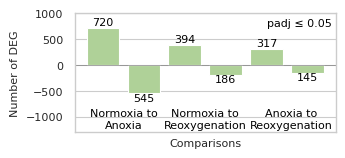

In [10]:

# Sample data
categories = dict_len.keys()
values = dict_len.values()

# Create a bar plot
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
plt.figure(figsize=(9/2.54, 4.25/2.54))

#plt.title("Differentially Expressed Genes (DEG)")
plt.xlabel("Comparisons")
plt.ylabel("Number of DEG")

# Add labels to the bars
for i, value in enumerate(values):
    if i %2==0:
        plt.text(i, value + 1, str(abs(value)), ha='center', va='bottom', color='black', fontsize=8)
    else:
        plt.text(i, value - 1, str(abs(value)), ha='center', va='top', color='black', fontsize=8)

# change the color of the bars (first two: blue, second two: red, third two: green)
plt.bar(range(len(dict_len)), list(dict_len.values()), align='center', color='#AFD198')

# for colorblind colors: color=['#44AAB2', '#44AAB2', '#2CD19A', '#2CD19A', '#EAB642', '#EAB642' ]

# extand the y scale from -500 to +700
plt.ylim(-1300, 1000)

# remove x scale
plt.xticks([])

# add a label in the center of the first two bars 
plt.text(0.5, -1050, 'Normoxia to\nAnoxia', ha='center', va='center', color='black', fontsize=8)
plt.text(2.5, -1050, 'Normoxia to\nReoxygenation', ha='center', va='center', color='black', fontsize=8)
plt.text(4.6, -1050, 'Anoxia to\nReoxygenation', ha='center', va='center', color='black', fontsize=8)


# add a 0 line 
# the line should be slim and grey
plt.axhline(y=0, color='grey', linestyle='-', linewidth=0.5)

# add a lable in the top right corner of the plot
plt.text(4.8, 800, f"padj ≤ {p_threshold}", ha='center', va='center', color='black', fontsize=8)
plt.tight_layout()
# Save the figure as a high-quality image (e.g., PNG or PDF)
plt.savefig('11_identify_DEG/DEG_barplot.svg')
# Show the plot
plt.show()


# 5 Venn Plot

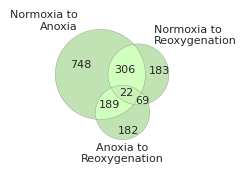

In [11]:
# PLOT VENN DIAGRAM 
sns.set_theme(style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
plt.figure(figsize=(7.5/2.54, 4.25/2.54))
v = venn3(subsets=(
    set(pd.concat([deg_na_up['Unnamed: 0'], deg_na_down['Unnamed: 0']])), 
    set(pd.concat([deg_nr_up['Unnamed: 0'], deg_nr_down['Unnamed: 0']])), 
    set(pd.concat([deg_ar_up['Unnamed: 0'], deg_ar_down['Unnamed: 0']]))),
    set_labels = ('Normoxia to\nAnoxia', 'Normoxia to\nReoxygenation', 'Anoxia to\nReoxygenation'), 
    set_colors=('#65B741', "#65B741", "#65B741"))
for text in v.set_labels:
    text.set_fontsize(8)
for text in v.subset_labels:
    text.set_fontsize(8)
venn3_circles(subsets=(
    set(pd.concat([deg_na_up['Unnamed: 0'], deg_na_down['Unnamed: 0']])), 
    set(pd.concat([deg_nr_up['Unnamed: 0'], deg_nr_down['Unnamed: 0']])), 
    set(pd.concat([deg_ar_up['Unnamed: 0'], deg_ar_down['Unnamed: 0']]))), 
    linewidth=0.1, color='black')
#plt.title('Common Differentially Expressed Genes (DEG) between comparisons')
plt.savefig('11_identify_DEG/venn_DEG.svg')




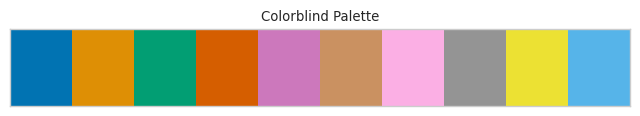

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn to the colorblind theme
sns.set_palette("colorblind")

# Get all colors in the colorblind palette
colorblind_palette = sns.color_palette("colorblind")

# Create a bar plot to display the colors
fig, ax = plt.subplots(figsize=(8, 1))
ax.imshow([colorblind_palette], aspect='auto', extent=(0, len(colorblind_palette), 0, 1))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Colorblind Palette')

plt.show()



# 6 Export DEG UP & DOWN as dataframes (to corralte with DMR)

In [13]:
# export deg as dataframe  
pd.concat([deg_na_up, deg_na_down]).to_csv('11_identify_DEG/deg_na.csv', index=False) 
pd.concat([deg_nr_up, deg_nr_down]).to_csv('11_identify_DEG/deg_nr.csv', index=False)
pd.concat([deg_ar_up, deg_ar_down]).to_csv('11_identify_DEG/deg_ar.csv', index=False)

# export deg_na up and down for GO enrichment analysis 
deg_na_up.to_csv('11_identify_DEG/deg_na_up.csv', index=False)
deg_na_down.to_csv('11_identify_DEG/deg_na_down.csv', index=False)
